<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/BuildProject_unit1_henry_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import folium

In [0]:
# from google.colab import files

# uploaded = files.upload()      ###  RUN first,  and then  Chese FILES !!!

Introduction:  
This is to analyze the bike rental industry from 2013 to 2015, which includes: San Francisco, San Jose, Mountain View, Redwood City, and Palo Alto.  
The goal is to find out :  

1 - the daily and monthly #trip (or rental) and the hours  
2 - which city has the most rental activity  
3 - how long do the customers use the bike in average  


The files for this analysis are: 'trip.csv' and 'station.csv'  which are available on: https://www.kaggle.com/benhamner/sf-bay-area-bike-share


After getting the datasets we can answer the questions above.

###Please note: the terminology of "trip" in this notebook is the same as "rental".

In [11]:
# Read both datasets  
# File 'station' and 'holidays' are the original datasets

station = pd.read_csv('station.csv')
trip = pd.read_csv('trip.csv')

print(station.head())
print(trip.head())

   id                               name  ...      city  installation_date
0   2  San Jose Diridon Caltrain Station  ...  San Jose           8/6/2013
1   3              San Jose Civic Center  ...  San Jose           8/5/2013
2   4             Santa Clara at Almaden  ...  San Jose           8/6/2013
3   5                   Adobe on Almaden  ...  San Jose           8/5/2013
4   6                   San Pedro Square  ...  San Jose           8/7/2013

[5 rows x 7 columns]
     id  duration       start_date  ... bike_id  subscription_type zip_code
0  4576        63  8/29/2013 14:13  ...     520         Subscriber    94127
1  4607        70  8/29/2013 14:42  ...     661         Subscriber    95138
2  4130        71  8/29/2013 10:16  ...      48         Subscriber    97214
3  4251        77  8/29/2013 11:29  ...      26         Subscriber    95060
4  4299        83  8/29/2013 12:02  ...     319         Subscriber    94103

[5 rows x 11 columns]


In [12]:
# Checking the shape, dtypes, and NaN values.

print("station    :",station.shape)
print("trip       :",trip.shape)
print()
trip.dtypes
trip.isnull().sum()

# Result shows only column "zip-code" has 'NaN'  which is not needed in our analysis

station    : (70, 7)
trip       : (669959, 11)



id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [13]:
# Check dtypes. 

print("*** station  : \n",station.dtypes)
print("\n*** trip     : \n",trip.dtypes)

*** station  : 
 id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

*** trip     : 
 id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object


In [0]:
# We see  both DataFrames have the same column name 'id' which is actually not the same purpose. 
# To avoid confusion during merging later, we need to rename  'id' column on trip DataFrame into 'trip'
trip.rename(columns={'id':'rent_id'}, inplace=True)

In [0]:
trip.head()

,rent_id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [19]:
# Mapping the whole Reantal station locations:

m = folium.Map(location = [station['lat'].mean(), station['long'].mean()], zoom_start=10,width=1000, height=600 )

def add_marker(row):
  marker = folium.CircleMarker([row['lat'], row['long']], radius=5, color='blue')
  marker.add_to(m)

station.apply(add_marker, axis=1)
m

In [0]:
# Before combining the two DataFrames, we need to make sure the date-related columns are correct. 
# The duration (second) will be converted into hours
# Create new columns: 'date' and 'month' for further analysis and plotting

trip['date'] = pd.DatetimeIndex(trip['start_date']).date
trip['month'] = pd.DatetimeIndex(trip['start_date']).to_period('M')
trip['hours'] = trip['duration']/3600

In [75]:
# holidays.dtypes
trip.dtypes

rent_id                   int64
duration                  int64
start_date               object
start_station_name       object
start_station_id          int64
end_date                 object
end_station_name         object
end_station_id            int64
bike_id                   int64
subscription_type        object
zip_code                 object
date                     object
month                 period[M]
hours                   float64
dtype: object

In [76]:
# Merge 'trip'  and 'station' based on station_id

trip_station = pd.merge(trip, station, left_on='start_station_id', right_on='id')

print("trip_station          :",  trip_station.shape, "\n")
trip_station.dtypes

trip_station          : (669959, 21) 



rent_id                   int64
duration                  int64
start_date               object
start_station_name       object
start_station_id          int64
end_date                 object
end_station_name         object
end_station_id            int64
bike_id                   int64
subscription_type        object
zip_code                 object
date                     object
month                 period[M]
hours                   float64
id                        int64
name                     object
lat                     float64
long                    float64
dock_count                int64
city                     object
installation_date        object
dtype: object

In [77]:
trip_station.head(2)

,rent_id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,month,hours,id,name,lat,long,dock_count,city,installation_date
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,2013-08,0.017500,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,2013-08,0.023056,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013


In [78]:
# Add column for duration classification to make a better visualization: <=5minute, <=1hr, <=6hr,  <= 1day, and >1day
# Rental duration for >4weeks will be considered as invalid.
# Note: there is no guidance for data duration validity

trip_station['duration_class'] = ['0-5mnt' if x <=300 else '05mnt-1hr'  if x <=3600 else '1-6hr' if x <=21600  else '6hr-1day' if x <=86400  else '>1 day' for x in trip_station['duration']]
trip_station.head(2)

,rent_id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,month,hours,id,name,lat,long,dock_count,city,installation_date,duration_class
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,2013-08,0.017500,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,0-5mnt
1,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,2013-08,0.023056,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,0-5mnt


In [79]:
# From now on we use new name (df) as a dataframe.
# Only include necessary columns for analysis

df = trip_station[trip_station['duration']<2600000][['rent_id', 'start_date', 'date', 'month' , 'start_station_name', 'city', 'hours', 'duration_class', 'subscription_type']]
df.head()


,rent_id,start_date,date,month,start_station_name,city,hours,duration_class,subscription_type
0,4576,8/29/2013 14:13,2013-08-29,2013-08,South Van Ness at Market,San Francisco,0.017500,0-5mnt,Subscriber
1,4299,8/29/2013 12:02,2013-08-29,2013-08,South Van Ness at Market,San Francisco,0.023056,0-5mnt,Subscriber
2,4760,8/29/2013 17:01,2013-08-29,2013-08,South Van Ness at Market,San Francisco,0.031389,0-5mnt,Subscriber
3,5070,8/29/2013 21:43,2013-08-29,2013-08,South Van Ness at Market,San Francisco,0.046667,0-5mnt,Subscriber
4,4765,8/29/2013 17:05,2013-08-29,2013-08,South Van Ness at Market,San Francisco,0.063333,0-5mnt,Subscriber


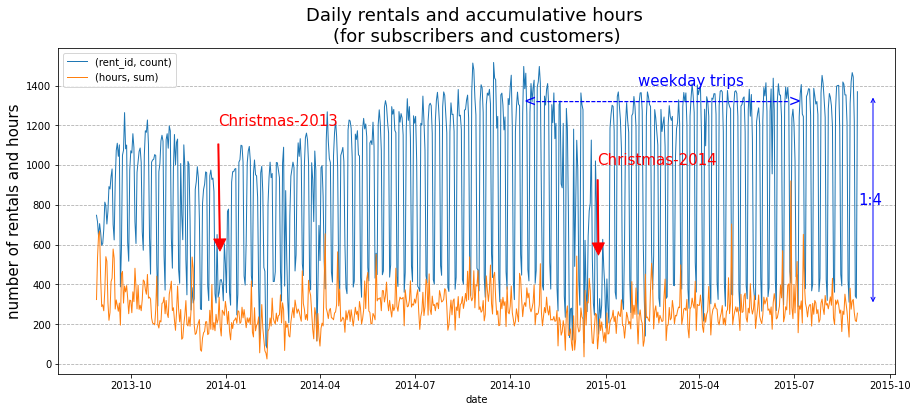

In [84]:
# This plot shows the duration in hour and number of trips per day
# Show the difference between weekdays, weekends & holidays

df_hours_daily = df.groupby(['date']).agg({'rent_id':['count'], 'hours':['sum']})
# trip_day.columns = ['day_mean', 'day_min', 'day_max', 'day_total']
ax = df_hours_daily.plot(figsize = (15,6), linewidth=1);
ax.set_ylabel('number of rentals and hours', size = 15);
ax.legend();
ax.grid(which='minor', linestyle='--')

# horizontal  <--->
ax.text('2015-02-01', 1400, 'weekday trips', color = 'blue', fontsize=15)
ax.text('2014-10-14', 1300, '<---------------------------------------------->', color = 'blue', fontsize=15)


# vertical arrow
ax.annotate('', xy=('2015-09-15', 300), xytext=('2015-09-15', 1350), arrowprops={'arrowstyle': '<->', 'color':'blue'}, va='baseline', color = 'blue')
ax.text('2015-09-01', 800, '1:4', color = 'blue', fontsize=15)

ax.annotate('Christmas-2014', xy=('2014-12-25', 500), xytext=('2014-12-24', 1000),color = 'red',size=15,  arrowprops=dict(color='red', shrink=0.1, width=1))
ax.annotate('Christmas-2013', xy=('2013-12-26', 500), xytext=('2013-12-24', 1200),color = 'red',size=15, arrowprops=dict(color='red', shrink=0.1, width=1))


# ax.annotate('Weekdays', xy=('2015-08-16', 1350) xytext=('2015-02-01', 1320), size=15,arrowprops=dict(facecolor='black', shrink=0.1, width=2))
# ax.annotate('Weekdays', xy=('2015-08-16', 1350), xytext=('2015-02-01', 1320), size=15,arrowprops=dict(facecolor='black', shrink=0.1, width=2))
# ax.annotate('~1:4', xy=('2015-10-01', 1400), xytext=('2015-08-28', 800), size=16,arrowprops=dict(facecolor='black', shrink=0.1, width=2))
ax.yaxis.grid(True, linestyle='--')

ax.set_title('Daily rentals and accumulative hours \n(for subscribers and customers)', size=18);


The highest trip was during the weekdays, but the average usage is around 15-20 minutes. These users are most likely the residents or subscribers.  
In the weekends and holidays, less people used the bikes, but the average was around 45 minute. These users are most likely the seasonal customers or tourists.  
Below is the proof that the average customers/tourists are using the bikes 1 hour/day  


In [0]:
customer = df[df['subscription_type']=='Customer']
subscriber = df[df['subscription_type']=='Subscriber']

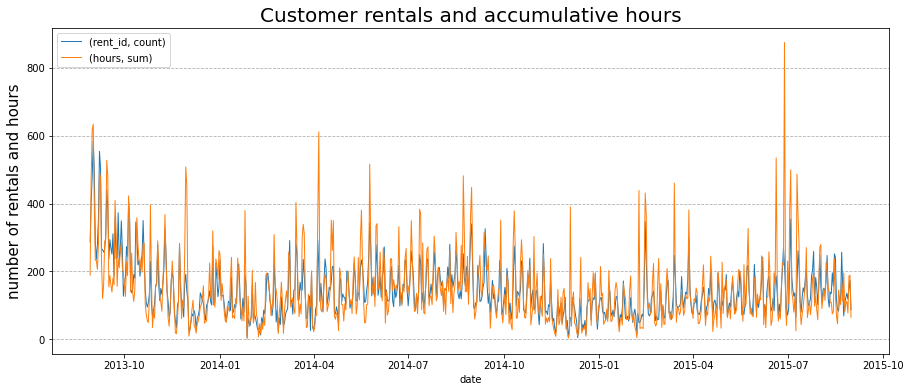

In [86]:
# This plot is for Customers only
# This plot shows the duration in hour and number of trips per day

cust_daily = customer.groupby(['date']).agg({'rent_id':['count'], 'hours':['sum']})
# trip_day.columns = ['day_mean', 'day_min', 'day_max', 'day_total']
ax = cust_daily.plot(figsize = (15,6), linewidth=1);
ax.set_ylabel('number of rentals and hours', size = 15);
ax.legend();
ax.grid(which='minor', linestyle='--')

ax.yaxis.grid(True, linestyle='--')
ax.set_title('Customer rentals and accumulative hours', size=20);


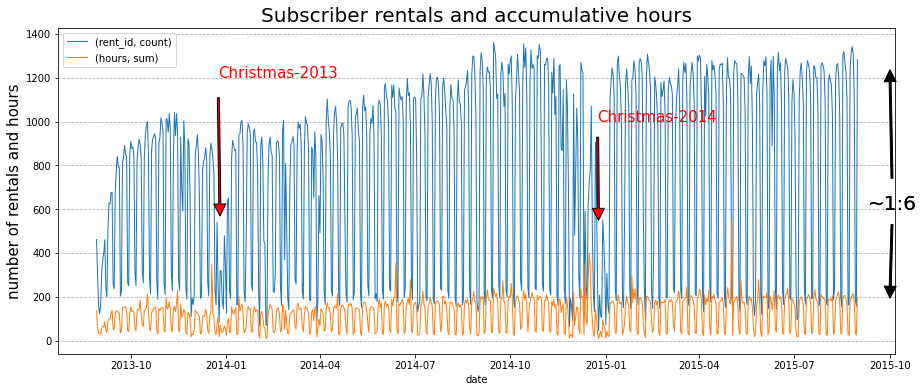

In [0]:
# This plot is for Subscribers only
# It shows the duration in hour and number of trips per day

subs_daily = subscriber.groupby(['date']).agg({'rent_id':['count'], 'hours':['sum']})
# trip_day.columns = ['day_mean', 'day_min', 'day_max', 'day_total']
ax = subs_daily.plot(figsize = (15,6), linewidth=1);
ax.legend();
ax.grid(which='minor', linestyle='--')
ax.annotate('Christmas-2014', xy=('2014-12-25', 500), xytext=('2014-12-24', 1000),color = 'red',size=15,  arrowprops=dict(facecolor='red', shrink=0.1, width=2))
ax.annotate('Christmas-2013', xy=('2013-12-26', 500), xytext=('2013-12-24', 1200),color = 'red',size=15, arrowprops=dict(facecolor='red', shrink=0.1, width=2))

ax.annotate('~1:6', xy=('2015-10-01', 150), xytext=('2015-09-10', 600), size=20,arrowprops=dict(facecolor='black', shrink=0.1, width=2))
ax.annotate('~1:6', xy=('2015-10-01', 1300), xytext=('2015-09-10', 600), size=20,arrowprops=dict(facecolor='black', shrink=0.1, width=2))
ax.yaxis.grid(True, linestyle='--')
ax.set_ylabel('number of rentals and hours', size = 15);
ax.set_title('Subscriber rentals and accumulative hours', size=20);


In [0]:
# Details of customers & subscribers trips per city

dfsubs = df.groupby(['city', 'subscription_type']).agg({'rent_id':['count'], 'hours':['mean']})#.reset_index()
dfsubs

rent_id     hours
                                  count      mean
city          subscription_type                  
Mountain View Customer             2710  2.412761
              Subscriber          15457  0.162569
Palo Alto     Customer             2946  2.363154
              Subscriber           3827  0.284248
Redwood City  Customer              638  2.859260
              Subscriber           2795  0.179529
San Francisco Customer            90709  0.926066
              Subscriber         512998  0.162644
San Jose      Customer             6209  1.477464
              Subscriber          31669  0.169015

###**Let's check the monthly visualization**

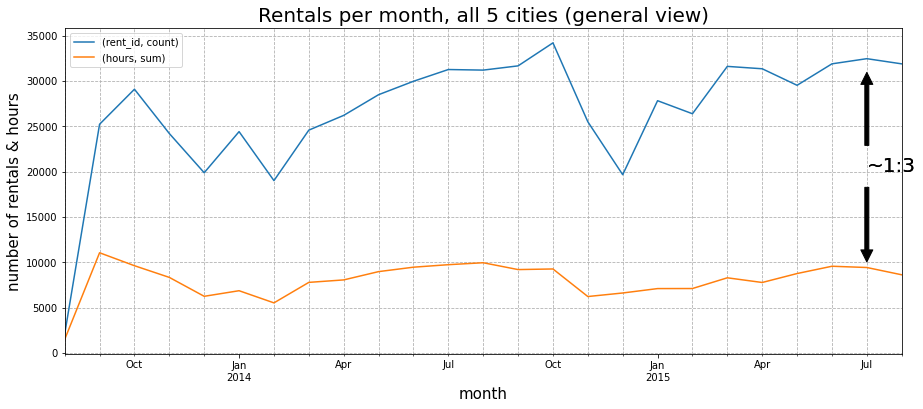

In [94]:
# Compare #of trips and duration-monthly
# From this plot we can estimate the average users sing the bikes

df_hours_monthly = df.groupby(['month']).agg({'rent_id':['count'], 'hours':['sum']})
ax = df_hours_monthly.plot(figsize = (15,6));
ax.grid(which='minor', linestyle='--')
ax.yaxis.grid(True, linestyle='--')
ax.set_ylabel('number of rentals & hours', size=15);
ax.set_xlabel('month', size=15);

ax.legend();
ax.annotate('~1:3', xy=('2015-07', 9000), xytext=('2015-07', 20000), size=20,arrowprops=dict(facecolor='black', shrink=0.1))
ax.annotate('~1:3', xy=('2015-07', 32000), xytext=('2015-07', 20000), size=20,arrowprops=dict(facecolor='black', shrink=0.1))
ax.set_title('Rentals per month, all 5 cities (general view)', size=20);

In [0]:
# Duration classification

df_class = df.groupby(['month', 'duration_class']).agg({'rent_id':['count']}).reset_index()
# df_class

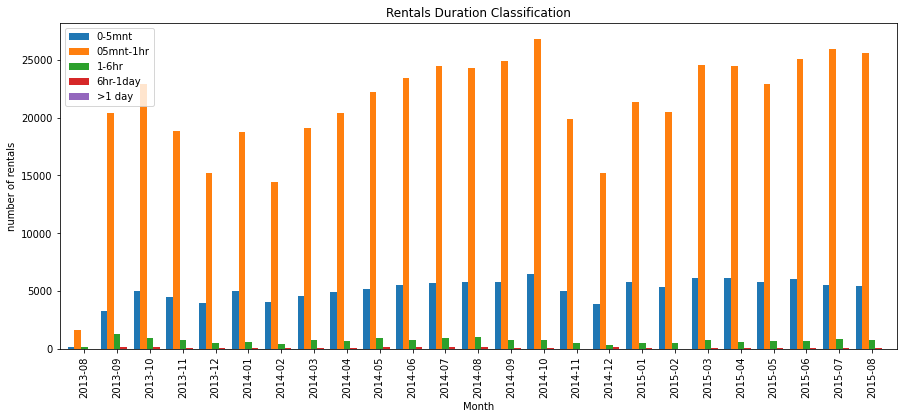

In [95]:
# Duration classification  is to see the spread how long the customers rent the bikes.

df1 = df.groupby(['month', 'duration_class']).size().unstack()
ax = df1.plot.bar(figsize=(15,6), width=1);

ax.grid(which='minor', linestyle='--')
ax.set_title('Rentals Duration Classification')
ax.set_xlabel('Month');
ax.set_ylabel('number of rentals');
ax.legend();

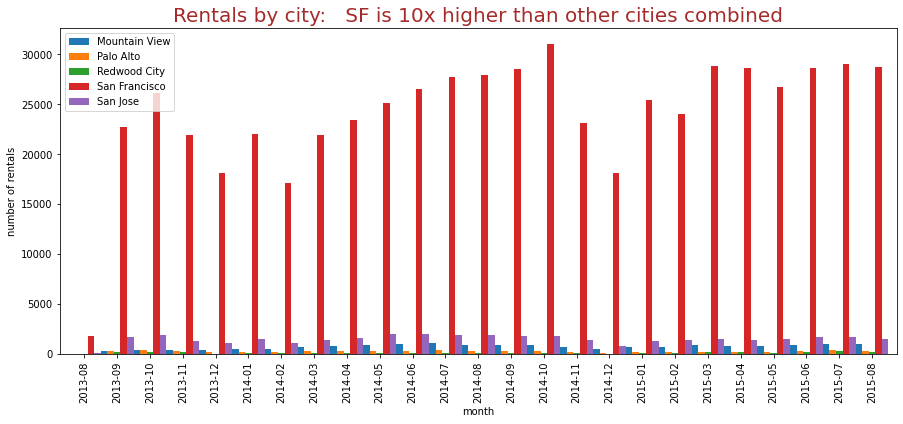

In [96]:
# Monthly rental by city

df1 = df.groupby(['month', 'city']).size().unstack()
ax = df1.plot.bar(figsize=(15,6), width=1);
ax.set_title('Rentals by city:   SF is 10x higher than other cities combined', size = 20, color='brown')
ax.set_xlabel('month');
ax.grid(which='minor', linestyle='--')
ax.set_ylabel('number of rentals');
ax.legend();

In [0]:
# Number of stations per city  and  number of docks per station
# Number of rentals per city is comparable with number of stations and docks

docks = station.groupby(['city']).agg({'city':['count'], 'dock_count':['sum']})
docks.reset_index()

city       dock_count
                 count        sum
0  Mountain View     7        117
1      Palo Alto     5         75
2   Redwood City     7        115
3  San Francisco    35        665
4       San Jose    16        264

# !!!! Attachments               !!!!!

In [0]:
# Check rental data stats per city


dfSF = df[df['city']=='San Francisco'][['rent_id', 'date', 'month' , 'city', 'hours', 'duration_class']]
dfSJ = df[df['city']=='San Jose'][['rent_id', 'date', 'month' , 'city', 'hours', 'duration_class']]
dfMV = df[df['city']=='Mountain View'][['rent_id', 'date', 'month' , 'city', 'hours', 'duration_class']]
dfRC = df[df['city']=='Redwood City'][['rent_id', 'date', 'month' , 'city', 'hours', 'duration_class']]
dfPA = df[df['city']=='Palo Alto'][['rent_id', 'date', 'month' , 'city', 'hours', 'duration_class']]


print("\nSan Francisco - mean : ",dfSF['hours'].mean())
print("\nSan Jose - mean      : ",dfSJ['hours'].mean())
print("\nMountain View - mean : ",dfMV['hours'].mean())
print("\nRedwood City - mean  : ",dfRC['hours'].mean())
print("\nPalo Alto - mean     : ",dfPA['hours'].mean())


# print("\nSan Francisco  : \n",dfSF['hours'].describe())
# print("\nSan Jose       : \n",dfSJ['hours'].describe())
# print("\nMountain View  : \n",dfMV['hours'].describe())
# print("\nRedwood City   : \n",dfRC['hours'].describe())
# print("\nPalo Alto      : \n",dfPA['hours'].describe())


# The general statistic per city shows :
# The longest average_duration is in Palo Alto (70 minute), and the shortest average_duration is in San Francisco (18 minute).
# There are more people in SF who rent bike to go for a short distant.


San Francisco - mean :  0.27735087090628124

San Jose - mean      :  0.3834968847352034

Mountain View - mean :  0.4982335798119913

Redwood City - mean  :  0.6775390005502141

Palo Alto - mean     :  1.188493610249846
